In [1]:
import pandas as pd
import numpy as np
import xgboost
from autoviz.AutoViz_Class import AutoViz_Class
AV = AutoViz_Class()

Imported AutoViz_Class. Call by using AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=0,
                            lowess=False,chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30)


In [12]:
import sys
sys.path.insert(0, './UCI-ML-API')
from UCI_ML_Functions import *

In [2]:
import csv

with open('communities.data.txt', 'r') as input_file:
   lines = input_file.readlines()
   newLines = []
   for line in lines:
      newLine = line.strip().split()
      newLines.append( newLine )

with open('communities.csv', 'w') as test_file:
   file_writer = csv.writer(test_file)
   file_writer.writerows( newLines )

In [3]:
f = open("communities.names.txt", "r")
names = f.read()
import re
cols = re.findall(r'(?<=@attribute\s).+?(?=\s+)',names)

In [4]:
comm_df = pd.read_csv('communities.csv', header=None)
comm_df = pd.DataFrame(comm_df[0].str.split(',').tolist(), columns=cols)
comm_df.head()

,state,county,community,communityname,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,8,?,?,Lakewoodcity,1,0.19,0.33,0.02,0.9,0.12,...,0.12,0.26,0.2,0.06,0.04,0.9,0.5,0.32,0.14,0.2
1,53,?,?,Tukwilacity,1,0,0.16,0.12,0.74,0.45,...,0.02,0.12,0.45,?,?,?,?,0,?,0.67
2,24,?,?,Aberdeentown,1,0,0.42,0.49,0.56,0.17,...,0.01,0.21,0.02,?,?,?,?,0,?,0.43
3,34,5,81440,Willingborotownship,1,0.04,0.77,1,0.08,0.12,...,0.02,0.39,0.28,?,?,?,?,0,?,0.12
4,42,95,6096,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,...,0.04,0.09,0.02,?,?,?,?,0,?,0.03


In [10]:
comm_df.replace('?', np.nan, inplace=True)

In [50]:
comm_df.iloc[:,2] = pd.to_numeric(comm_df.iloc[:,2])
comm_df.iloc[:,2]

0           NaN
1           NaN
2           NaN
3       81440.0
4        6096.0
         ...   
1989        NaN
1990        NaN
1991    80070.0
1992    72600.0
1993        NaN
Name: community, Length: 1994, dtype: float64

In [56]:
comm_df.iloc[:,comm_df.columns != 'communityname'] = comm_df.iloc[:,comm_df.columns != 'communityname'].astype(float)
comm_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Columns: 128 entries, state to ViolentCrimesPerPop
dtypes: float64(127), object(1)
memory usage: 1.9+ MB


In [61]:
comm_df.to_csv('comm.csv', encoding='utf-8')

In [54]:
!pip freeze | grep xgboost

xgboost==0.90


In [62]:
filename = 'comm.csv'
sep = ','
dft = AV.AutoViz(filename, 'ViolentCrimesPerPop', header=0, verbose=2, lowess=False, chart_format='svg', max_rows_analyzed=150000, max_cols_analyzed=30)

Shape of your Data Set: (1994, 2)
Classifying variables in data set...
    2 Predictors classified...
        This does not include the Target column(s)
    2 variables removed since they were ID or low-information variables
    List of variables removed: [',state,county,community,communityname,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,numbUrban,pctUrban,medIncome,pctWWage,pctWFarmSelf,pctWInvInc,pctWSocSec,pctWPubAsst,pctWRetire,medFamInc,perCapInc,whitePerCap,blackPerCap,indianPerCap,AsianPerCap,OtherPerCap,HispPerCap,NumUnderPov,PctPopUnderPov,PctLess9thGrade,PctNotHSGrad,PctBSorMore,PctUnemployed,PctEmploy,PctEmplManu,PctEmplProfServ,PctOccupManu,PctOccupMgmtProf,MalePctDivorce,MalePctNevMarr,FemalePctDiv,TotalPctDiv,PersPerFam,PctFam2Par,PctKids2Par,PctYoungKids2Par,PctTeen2Par,PctWorkMomYoungKids,PctWorkMom,NumIlleg,PctIlleg,NumImmig,PctImmigRecent,PctImmigRec5,PctImmigRec8,PctImmigRec10,PctRece

Shape of your Data Set: (24611, 8)
Classifying variables in data set...
    7 Predictors classified...
        This does not include the Target column(s)
    4 variables removed since they were ID or low-information variables
    List of variables removed: ['state', 'state_abbreviation', 'county', 'candidate']
Number of All Scatter Plots = 3
Could not draw Distribution Plots
All Plots done
Time to run AutoViz (in seconds) = 5.788


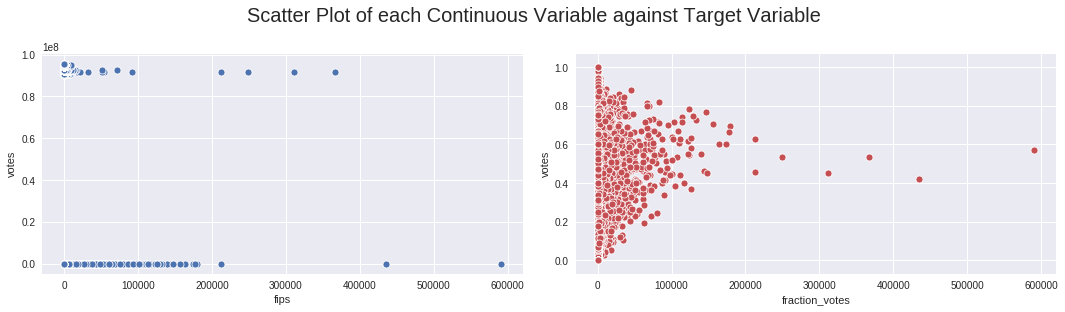

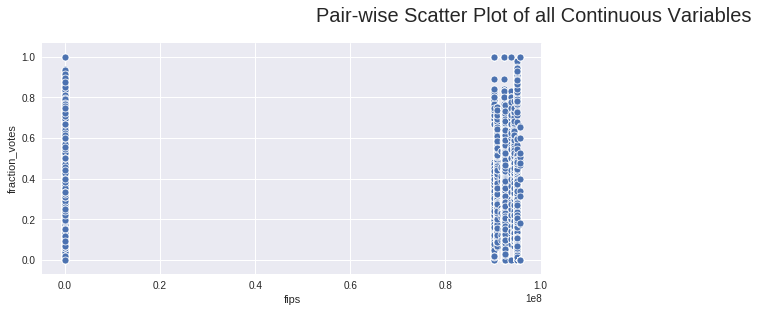

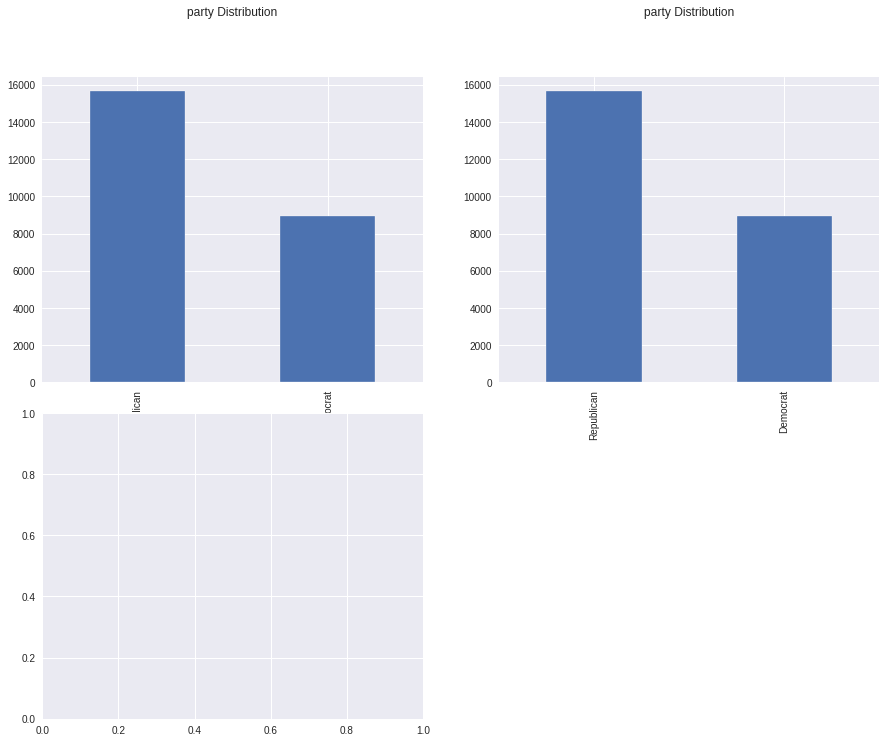

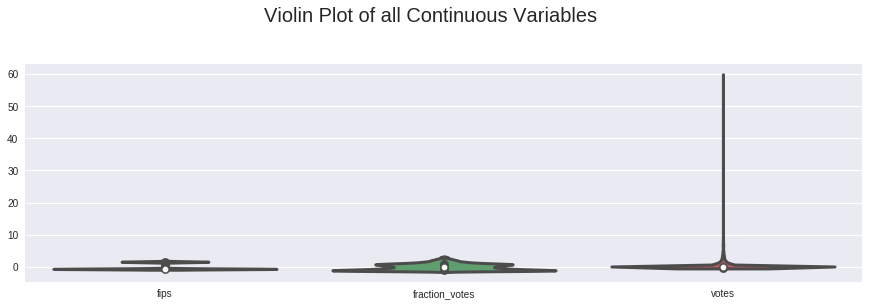

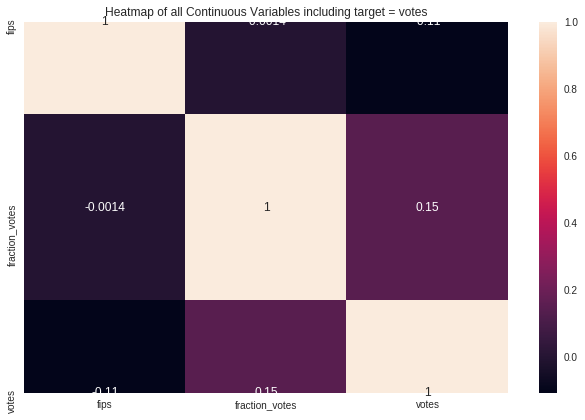

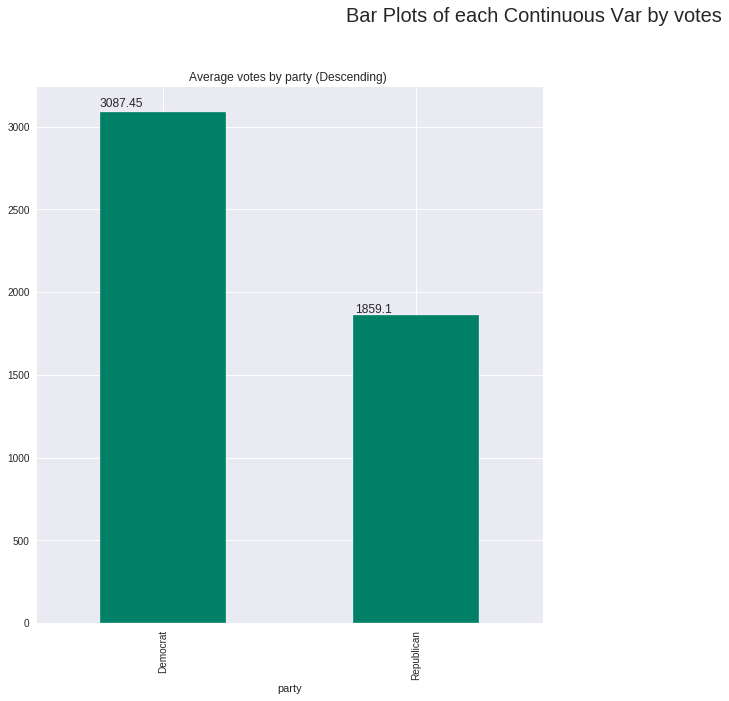

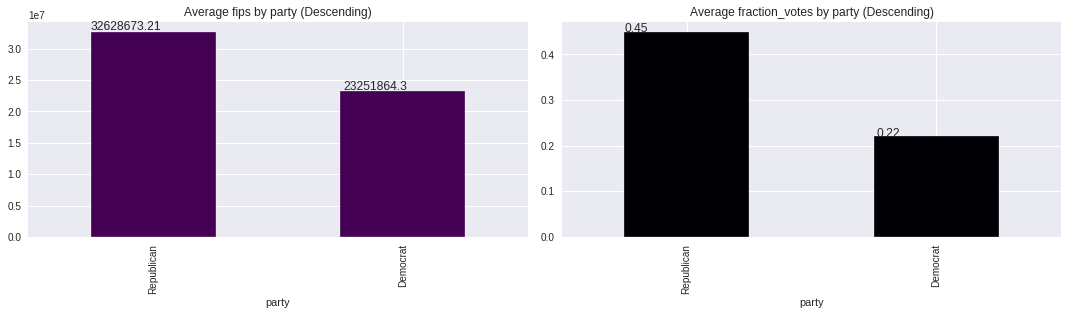

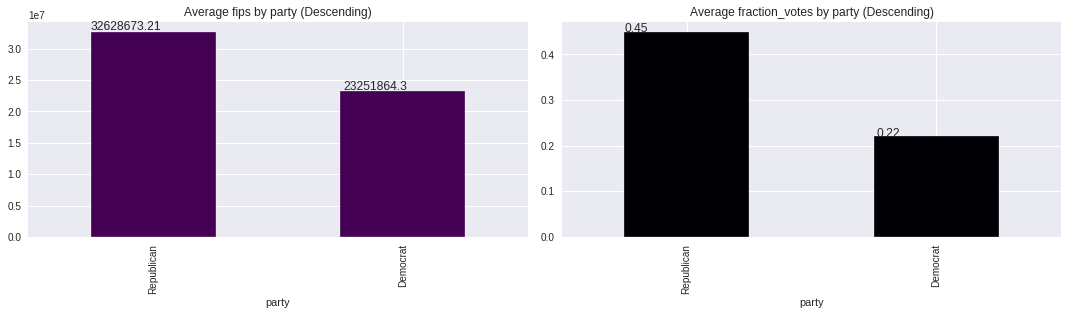

In [59]:
filename = 'primary_results.csv'
sep = ','
dft = AV.AutoViz(filename, sep, 'votes', header=0, verbose=2, lowess=False, chart_format='svg', max_rows_analyzed=150000, max_cols_analyzed=30)

In [ ]:
filename = 'appstore_games.csv'
sep = ','
dft = AV.AutoViz(filename, sep, 'Average User Rating', header=0, verbose=2, lowess=False, chart_format='svg', max_rows_analyzed=150000, max_cols_analyzed=30)

Shape of your Data Set: (17007, 18)
Classifying variables in data set...
    17 Predictors classified...
        This does not include the Target column(s)
    12 variables removed since they were ID or low-information variables
    List of variables removed: ['URL', 'Icon URL', 'Description', 'Name', 'Subtitle', 'In-app Purchases', 'Developer', 'Languages', 'Primary Genre', 'Genres', 'Original Release Date', 'Current Version Release Date']
Total Number of Scatter Plots = 6


Time to run AutoViz (in seconds) = 1359.910
